In [356]:
import pandas as pd 
from pathlib import Path
import sys
import requests
import csv
# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests
import json

# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


In [357]:
from src.data.file_manager import FileManager
weatherManager = FileManager()
color_pal = sns.color_palette()

In [358]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'raw_data.csv')
df_temperature_final = pd.read_csv(raw_path)
df_temperature_final

,index,AverageTemperature
0,2000,11.738083
1,2001,11.361583
2,2002,11.767500
3,2003,12.076917
4,2004,11.266333
5,2005,11.229083
6,2006,11.871250
7,2007,11.571833
8,2008,11.200750
9,2009,11.607500


In [359]:
# Make a GET request to the API endpoint
url = 'http://134.209.22.28/api/collections/weather/records'
response = requests.get(url)

In [360]:
# # Check if the request was successful
# if response.status_code == 200:
#     # Load the response content as JSON
#     data = json.loads(response.content)
    
#     # Access the desired data
#     items = data['items'] 
    
#     # Iterate over the items
#     for item in items:
#         collection_id = item['collectionId']
#         collection_name = item['collectionName']
#         created = item['created']
#         date = item['date']
#         disease = item['disease']
#         domain = item['domain']
#         humidity = item['humidity']
#         item_id = item['id']
#         insect = item['insect']
#         temperature = item['temperature']
#         updated = item['updated']
#         print(f"Temperature: {temperature}")
# else:
#     print(f"Request failed with status code: {response.status_code}")


In [361]:
import requests
import json

# Make a GET request to the API endpoint
url = 'http://134.209.22.28/api/collections/weather/records?perPage=500&page=10'
response = requests.get(url)

# Check if the request was successful

# Load the response content as JSON
data = json.loads(response.content)

# Access the desired data for the domain 'Gevrey'
items = data['items']
gevrey_data = [item for item in items if item['domain'] == 'Gevrey']

# Select only the first 30 items
gevrey_data = gevrey_data[:30]

# Iterate over the gevrey_data
for item in gevrey_data:
    collection_id = item['collectionId']
    collection_name = item['collectionName']
    created = item['created']
    date = item['date']
    disease = item['disease']
    domain = item['domain']
    humidity = item['humidity']
    item_id = item['id']
    insect = item['insect']
    temperature = item['temperature']
    updated = item['updated']
    
    print(f"Temperature: {temperature}")


Temperature: 19
Temperature: 20
Temperature: 19
Temperature: 20
Temperature: 21
Temperature: 22
Temperature: 23
Temperature: 26
Temperature: 28
Temperature: 25
Temperature: 26
Temperature: 24
Temperature: 27
Temperature: 28
Temperature: 29
Temperature: 25
Temperature: 26
Temperature: 29
Temperature: 25
Temperature: 29
Temperature: 30
Temperature: 31
Temperature: 28
Temperature: 29
Temperature: 32
Temperature: 33


In [362]:
data.pop('page', None)
data.pop('perPage', None)
data.pop('totalItems', None)
data.pop('totalPages', None)

8

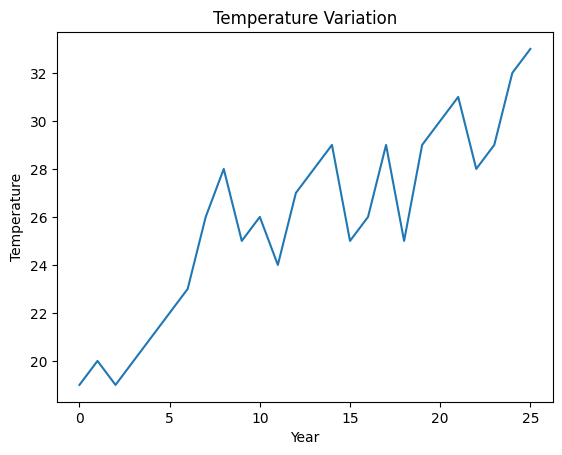

In [363]:
temperatures = [item['temperature'] for item in gevrey_data]

# Create a line plot
plt.plot(temperatures)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

In [364]:
# Create a DataFrame from the 'data' variable
df_vigne = pd.DataFrame(temperatures)
df_vigne_final = df_vigne.rename(columns={'0': 'ds'})
df_vigne_final


,0
0,19
1,20
2,19
3,20
4,21
5,22
6,23
7,26
8,28
9,25


In [365]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'theo_data.csv')
# df_vigne = df_vigne.reset_index()
df_vigne.to_csv(raw_path, index=False)

<Axes: >

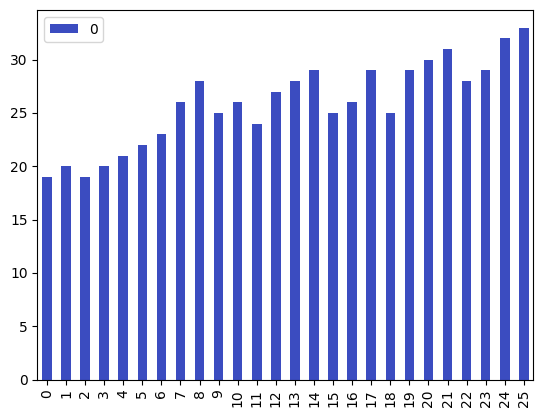

In [366]:
df_vigne.plot(kind='bar', stacked=True, colormap='coolwarm')

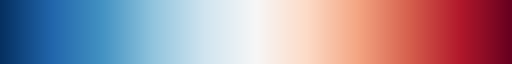

In [367]:
plt.get_cmap('RdBu_r')

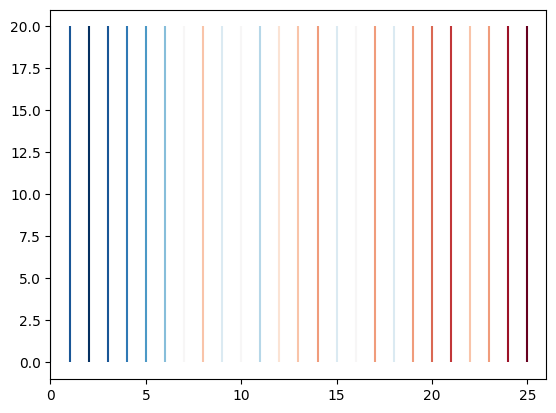

In [368]:
from numpy import interp

cmap = plt.get_cmap('RdBu_r')

temp_min = df_vigne.min()
temp_max = df_vigne.max()
mean = df_vigne.mean()

def getColor(temperature):
    value = temperature.iloc[0]  # Access the first value in the DataFrame
    return np.interp(value, [float(temp_min), float(mean), float(temp_max)], [0, 0.5, 1])

cpt = 0

# Iterate over the DataFrame rows
for index, row in df_vigne.iterrows():
    temperature = row[0]  # Assuming the temperature column is at index 0
    # Normalize the temperature value between 0 and 1
    norm_temp = (temperature - temp_min) / (temp_max - temp_min)
    
    # Get the color from the colormap based on the normalized temperature
    color = cmap(norm_temp)
    # Draw a vertical line at the specified position with the color
    plt.vlines(cpt, 0, 20, color=color)
    cpt += 1

# Set the x-axis limits
plt.xlim(0, len(df_vigne))

# Display the plot
plt.show()

In [369]:
# Perform the merge using outer join
merged_df = df_vigne.merge(df_temperature_final, how='right', left_index=True, right_index=True)
merged_df.drop('index', axis=1, inplace=True)
merged_df

,0,AverageTemperature
0,19,11.738083
1,20,11.361583
2,19,11.767500
3,20,12.076917
4,21,11.266333
5,22,11.229083
6,23,11.871250
7,26,11.571833
8,28,11.200750
9,25,11.607500


In [370]:
raw_dir_path = weatherManager.data_dir / 'raw'
print(raw_dir_path)

raw_path = str(raw_dir_path / 'vigne_humidity_data.csv')
merged_df = merged_df.rename(columns={'o': 'Years'})
merged_df.to_csv(raw_path, index=False)
merged_df

/home/dylan/Desktop/IA_Voltron/voltron_ia/notebooks/dataprocessing_vigne/../../data/raw


,0,AverageTemperature
0,19,11.738083
1,20,11.361583
2,19,11.767500
3,20,12.076917
4,21,11.266333
5,22,11.229083
6,23,11.871250
7,26,11.571833
8,28,11.200750
9,25,11.607500
